In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import models as md
sns.set()

[131.57894737  65.78947368  44.64285714  33.78378378  26.88172043
  22.52252252]


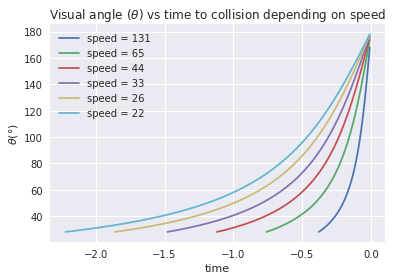

In [2]:
# these values are taken from Bhattacharyya et. al 2017:
LV_vals = np.array([0.19, 0.38, 0.56, 0.74, 0.93, 1.11])
stim_size = 25
speeds = 1/(LV_vals/stim_size)
print(speeds)

#plt.figure(figsize=(8,8))
for speed in speeds:
    t, stims, dists = md.generate_stimulus(stim_size=stim_size, speed=speed, dt=0.01)
    collision_idx = np.argmin(np.abs(dists))
    t_collision = t[collision_idx]
    stim_collision = stims[collision_idx]
    
    before_collision_mask = t<t_collision
    t_to_collision = t[before_collision_mask] - t_collision
    stim_to_collision = stims[before_collision_mask]
    plt.plot(t_to_collision, stim_to_collision, label='speed = ' + str(int(speed)))
plt.xlabel('time')
plt.ylabel(r'$\theta (\degree)$')
plt.title(r'Visual angle ($\theta$) vs time to collision depending on speed')
plt.legend()
#print(dists)

[28.072486935852957, 11.421186274999284]


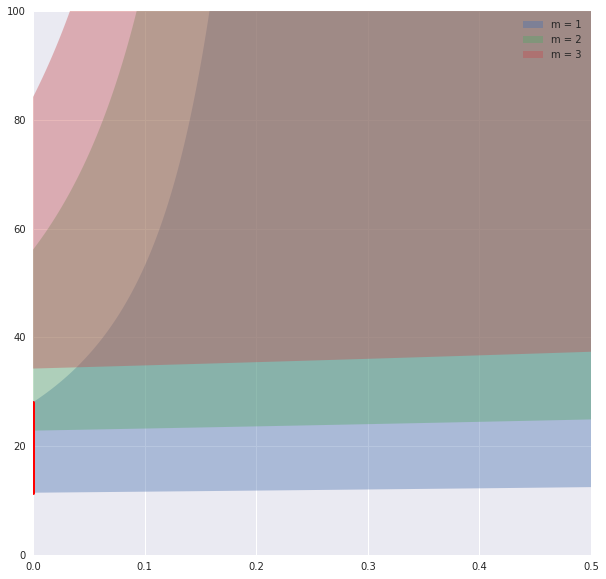

In [3]:
length = 10
dt = 0.001
m = 1.5
b = 0
plt.figure(figsize=(10, 10))

for m, mcolor in zip([1, 2, 3], ['r', 'g', 'b']):
    lv1 = 0.1
    lv2 = 1.2
    stim_size1 = 25
    stim_size2 = 10
    speed1 = 1/(lv1/stim_size1)
    speed2 = 1/(lv2/stim_size2)
    t, stims, tstims1, dists, t_to_collision, transformed_stim_to_collision = md.transform_stim(stim_size1, speed1, length, dt, m, b)
    t, stims, tstims2, dists, t_to_collision, transformed_stim_to_collision = md.transform_stim(stim_size2, speed2, length, dt, m, b)
    #plt.figure()
    plt.fill_between(t, tstims1, tstims2, alpha=0.4, label='m = ' + str(m), lw=4, linestyle='-')
    if m == 1:
        plt.plot([0, 0], [tstims1[0], tstims2[0]], 'r', lw=3)
        print([tstims1[0], tstims2[0]])
    plt.xlim([0, 0.5])
    plt.ylim([0, 100])
    plt.legend()
#plt.plot(t, dists)

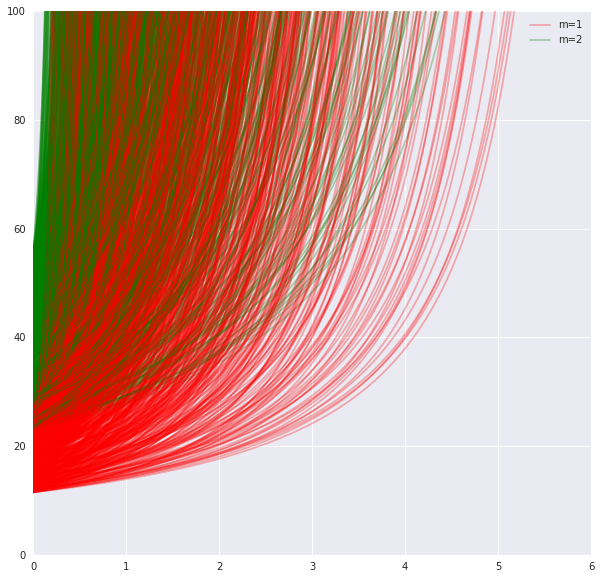

In [13]:
LV_vals = np.array([0.19, 0.38, 0.56, 0.74, 0.93, 1.11])
stim_size = 15
length = 10
dt = 0.001
m = 1
b = 0
critical_angle = 35

speeds = 1/(LV_vals/stim_size)
speed = speeds[3]

lv_list = []
resp_t_list = []
resp_dist_list = []
resp_ttc_list = []

plt.figure(figsize=(10, 10))
for i in range(1000):
    lv = np.random.rand()*1.1 + 0.1
    stim_size = np.random.rand()*15 + 10
    speed = 1/(lv/stim_size)
    for m, mcolor in zip([1, 2], ['r', 'g']):
        t, stims, tstims, dists, t_to_collision, transformed_stim_to_collision = md.transform_stim(stim_size, speed, length, dt, m, b)
        
        t_resp_idx = np.argmin(np.abs(tstims - critical_angle))
        lv_list.append(lv)
        resp_t_list.append(t[t_resp_idx])
        resp_ttc_list.append(t_to_collision[t_resp_idx])
        resp_dist_list.append(dists[t_resp_idx])
        
        if i == 0:
            plt.plot(t, tstims, c=mcolor, alpha=0.3, label='m=' + str(m))
        else:
            plt.plot(t, tstims, c=mcolor, alpha=0.3)
plt.xlim([0, 6])
plt.ylim([0, 100])
plt.legend()
#plt.plot(t, dists)

In [33]:
lv_list = []
resp_t_list = []
resp_dist_list = []
resp_ttc_list = []

for i in range(1000):
    lv = np.random.rand()*1.1 + 0.1
    stim_size = np.random.rand()*15 + 10
    speed = 1/(lv/stim_size)
    m=1
    t, stims, tstims, dists, t_to_collision, transformed_stim_to_collision = md.transform_stim(stim_size, speed, length, dt, m, b)

    t_resp_idx = np.argmin(np.abs(tstims - critical_angle))
    lv_list.append(lv)
    resp_t_list.append(t[t_resp_idx])
    resp_ttc_list.append(t_to_collision[t_resp_idx])
    resp_dist_list.append(dists[t_resp_idx])

In [34]:
lvs = np.array(lv_list)
resp_times = np.array(resp_t_list)
resp_ttcs = np.array(resp_ttc_list)
resp_dists = np.array(resp_dist_list)

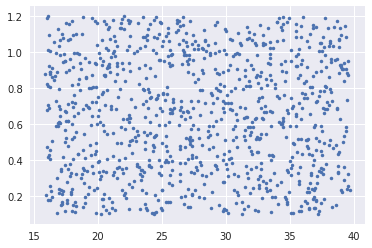

In [35]:
plt.plot(resp_dists, lvs, '.')

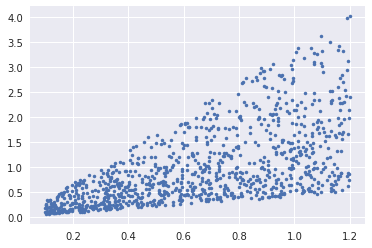

In [37]:
plt.plot(lvs, resp_times, '.')

In [43]:
l = 10
lv = 0.1
v = l/lv
di = 50
critical_angle = 35
tan_ca = np.tan(critical_angle/360*2*np.pi)
tcr = di/v - l/(2*a*v)
print(tcr)

0.42859259966289426


In [40]:
50/np.tan(35/360*2*np.pi)

0.7002075382097097

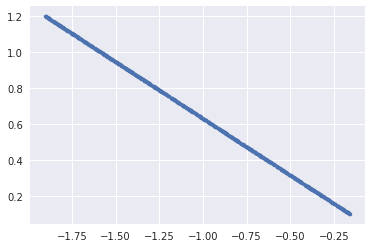

In [31]:
plt.plot(resp_ttcs, lvs, '.')

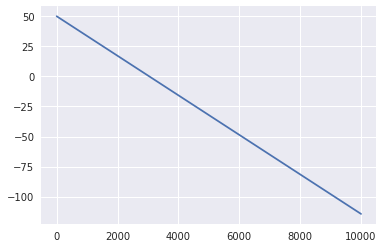

In [5]:

plt.plot(dists)